torch.Size([101, 128]) torch.Size([101])


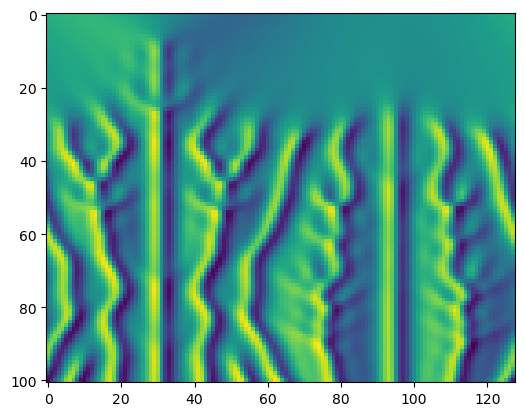

In [1]:
import torch as th
from torch.fft import fft, ifft
import matplotlib.pyplot as plt

# Spatial grid and initial condition
N = 128
x = 32*th.pi*th.arange(1,N+1)/N
u = th.cos(x/16)*(1+th.sin(x/16))
v = fft(u)

# Precompute ETDRK4 scalar quantities
h = 1/4
k = th.cat([th.arange(0,N/2),th.tensor([0.]),th.arange(-N/2+1,0)],0)/16
L = k**2 - k**4 
E = (h*L).exp()
E2 = (h*L/2).exp()
M = 16
r = (1j*th.pi*(th.arange(1,M+1)-.5)/M)
LR = h*L[:,None].repeat_interleave(M,1) + r[None,:].repeat_interleave(N,0)
Q = h*(((LR/2).exp()-1)/LR).mean(dim=1).real
f1 = h*((-4-LR+LR.exp()*(4-3*LR+LR**2))/LR**3).mean(dim=1).real
f2 = h*((2+LR+LR.exp()*(-2+LR))/LR**3).mean(dim=1).real
f3 = h*((-4-3*LR-LR**2+LR.exp()*(4-LR))/LR**3).mean(dim=1).real

# Timestepping
uu = [u]
tt = [0]
tmax = 150
nmax = int(tmax/h)
nplt = int((tmax/100)/h)
g = -.5j*k

for n in range(1,nmax+1):
    t = n*h
    Nv = g * fft(ifft(v).real**2)
    a = E2*v + Q*Nv
    Na = g * fft(ifft(a).real**2)
    b = E2*v + Q*Na
    Nb = g * fft(ifft(b).real**2)
    c = E2*a + Q*(2*Nb-Nv)
    Nc = g * fft(ifft(c).real**2)
    v = E*v + Nv*f1 + 2*(Na+Nb)*f2 + Nc*f3
    if n%nplt==0:
        u = ifft(v).real
        uu.append(u)
        tt.append(t) 

uu = th.stack(uu)
tt = th.tensor(tt)

print(uu.shape, tt.shape)

plt.imshow(uu)
plt.show()

In [2]:
th.cat([th.arange(0,N/2),th.tensor([0.]),th.arange(-N/2+1,0)],0)/16

tensor([ 0.0000,  0.0625,  0.1250,  0.1875,  0.2500,  0.3125,  0.3750,  0.4375,
         0.5000,  0.5625,  0.6250,  0.6875,  0.7500,  0.8125,  0.8750,  0.9375,
         1.0000,  1.0625,  1.1250,  1.1875,  1.2500,  1.3125,  1.3750,  1.4375,
         1.5000,  1.5625,  1.6250,  1.6875,  1.7500,  1.8125,  1.8750,  1.9375,
         2.0000,  2.0625,  2.1250,  2.1875,  2.2500,  2.3125,  2.3750,  2.4375,
         2.5000,  2.5625,  2.6250,  2.6875,  2.7500,  2.8125,  2.8750,  2.9375,
         3.0000,  3.0625,  3.1250,  3.1875,  3.2500,  3.3125,  3.3750,  3.4375,
         3.5000,  3.5625,  3.6250,  3.6875,  3.7500,  3.8125,  3.8750,  3.9375,
         0.0000, -3.9375, -3.8750, -3.8125, -3.7500, -3.6875, -3.6250, -3.5625,
        -3.5000, -3.4375, -3.3750, -3.3125, -3.2500, -3.1875, -3.1250, -3.0625,
        -3.0000, -2.9375, -2.8750, -2.8125, -2.7500, -2.6875, -2.6250, -2.5625,
        -2.5000, -2.4375, -2.3750, -2.3125, -2.2500, -2.1875, -2.1250, -2.0625,
        -2.0000, -1.9375, -1.8750, -1.81

In [ ]:
import numpy as np

np.fft.fftfreq(8, d=1)

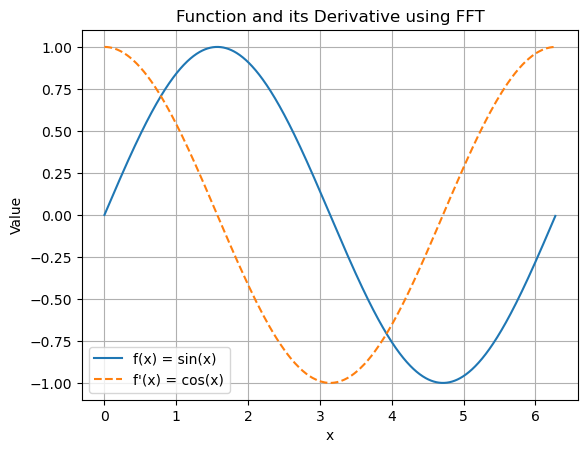

In [39]:
import torch
import torch.fft

# Define the number of sample points and the domain
n = 1024
dx = 2 * torch.pi / n
x = torch.linspace(0, 2 * torch.pi - dx, n)
# Define the function f(x) = sin(x)
f_x = torch.sin(x)
# Compute the FFT of the function
F_k = torch.fft.fft(f_x)
# Define the frequencies
k = torch.fft.fftfreq(n, d=(2 * torch.pi / n))
# Compute the  derivative
derivative_fft = 1j * k * F_k * (2 * torch.pi)
# Compute the inverse FFT to get the derivative in the time domain
df_x = torch.fft.ifft(derivative_fft).real  
# The real part is taken as the result since the input is real-valued
# Print the original function and its derivative
import matplotlib.pyplot as plt

plt.plot(x, f_x, label='f(x) = sin(x)')
plt.plot(x, df_x, label="f'(x) = cos(x)", linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Function and its Derivative using FFT')
plt.grid(True)
plt.show()


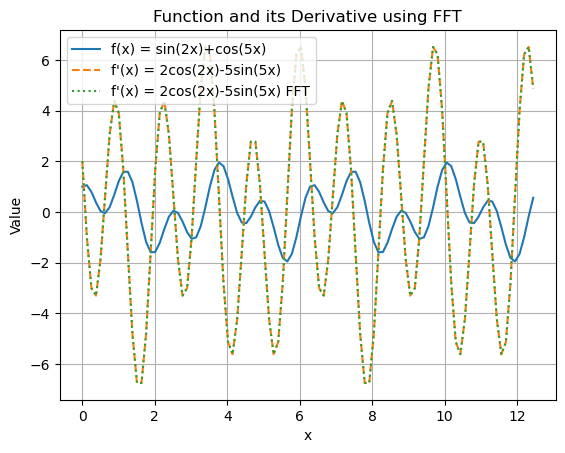

In [3]:
import torch
import matplotlib.pyplot as plt
N=100
x=4*torch.pi*torch.arange(0,N,1)/N
dx = x[1]-x[0]
y = torch.sin(2*x)+torch.cos(5*x)
dydx = 2*torch.cos(2*x)-5*torch.sin(5*x)

k=torch.fft.fftfreq(N, d=dx)
dydx_fft = torch.fft.fft(y)*1j*k*2*torch.pi
dydx_fft=torch.fft.ifft(dydx_fft).real

plt.plot(x, y, label='f(x) = sin(2x)+cos(5x)')
plt.plot(x, dydx, label="f'(x) = 2cos(2x)-5sin(5x)", linestyle='dashed')
plt.plot(x, dydx_fft, label="f'(x) = 2cos(2x)-5sin(5x) FFT", linestyle='dotted')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Function and its Derivative using FFT')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
x=8*torch.pi*torch.arange(0,N,1)/N
x-torch.fft.ifft(torch.fft.fft(x))

tensor([1.2207e-06+1.5259e-07j, 1.7583e-06+3.2408e-08j, 2.2650e-06-4.4770e-07j,
        3.9935e-06+1.3172e-07j, 2.1458e-06+8.7839e-08j, 3.8147e-06+1.1200e-07j,
        1.9073e-06+4.8396e-07j, 5.6028e-06-2.5027e-07j, 3.0994e-06+5.9152e-07j,
        5.2452e-06+5.6197e-08j, 3.3379e-06-4.9766e-07j, 2.1458e-06-2.1285e-08j,
        2.6226e-06-4.6819e-07j, 3.8147e-06-1.8649e-07j, 2.6226e-06-5.1000e-08j,
        3.5763e-06+4.1711e-07j, 2.3842e-06+3.4062e-07j, 5.2452e-06-2.6346e-08j,
        4.2915e-06-1.8213e-08j, 3.8147e-06-4.3119e-07j, 3.8147e-06-1.4802e-07j,
        1.9073e-06+2.0523e-08j, 3.8147e-06-6.7422e-08j, 3.3379e-06+4.4593e-07j,
        2.8610e-06+1.3818e-07j, 2.8610e-06-4.5776e-07j, 3.3379e-06-2.2314e-07j,
        3.3379e-06-3.9153e-07j, 3.8147e-06+3.2604e-07j, 3.3379e-06+3.3178e-07j,
        4.7684e-06+1.2061e-07j, 4.7684e-07-5.0399e-07j, 4.7684e-06-6.3356e-07j,
        2.8610e-06+1.8339e-07j, 4.7684e-06-7.3365e-07j, 3.8147e-06-1.5754e-07j,
        4.7684e-06-2.0368e-07j, 2.8610e-

[ 0.          0.15915494  0.31830989  0.47746483  0.63661977  0.79577472
  0.95492966  1.1140846   1.27323954  1.43239449  1.59154943  1.75070437
  1.90985932  2.06901426  2.2281692   2.38732415  2.54647909  2.70563403
  2.86478898  3.02394392  3.18309886  3.3422538   3.50140875  3.66056369
  3.81971863  3.97887358  4.13802852  4.29718346  4.45633841  4.61549335
  4.77464829  4.93380324  5.09295818  5.25211312  5.41126807  5.57042301
  5.72957795  5.88873289  6.04788784  6.20704278  6.36619772  6.52535267
  6.68450761  6.84366255  7.0028175   7.16197244  7.32112738  7.48028233
  7.63943727  7.79859221 -7.95774715 -7.79859221 -7.63943727 -7.48028233
 -7.32112738 -7.16197244 -7.0028175  -6.84366255 -6.68450761 -6.52535267
 -6.36619772 -6.20704278 -6.04788784 -5.88873289 -5.72957795 -5.57042301
 -5.41126807 -5.25211312 -5.09295818 -4.93380324 -4.77464829 -4.61549335
 -4.45633841 -4.29718346 -4.13802852 -3.97887358 -3.81971863 -3.66056369
 -3.50140875 -3.3422538  -3.18309886 -3.02394392 -2

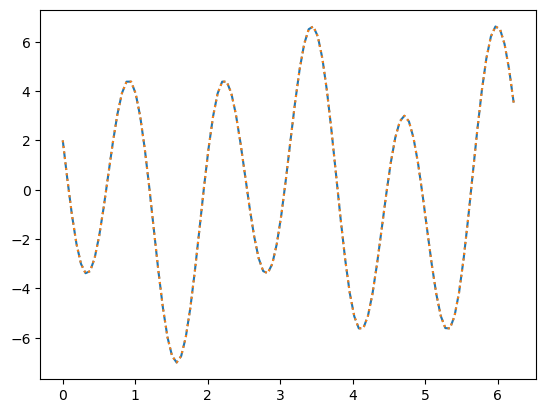

In [23]:
import numpy as np
N=100
x=2*np.pi*np.arange(0,N,1)/N
dx = x[1]-x[0]
y = np.sin(2*x)+np.cos(5*x)
dydx = 2*np.cos(2*x)-5*np.sin(5*x)

k=np.fft.fftfreq(N, d=dx)
print(k)
dydx_fft = np.fft.fft(y)*1j*k*2*np.pi
dydx_fft=np.fft.ifft(dydx_fft).real

#plt.plot(x, y, label='f(x) = sin(2x)+cos(5x)')
plt.plot(x, dydx, label="f'(x) = 2cos(2x)-5sin(5x)", linestyle='dashed')
plt.plot(x, dydx_fft, label="f'(x) = 2cos(2x)-5sin(5x) FFT", linestyle='dotted')

[ 0.          0.15915494  0.31830989  0.47746483  0.63661977  0.79577472
  0.95492966  1.1140846   1.27323954  1.43239449  1.59154943  1.75070437
  1.90985932  2.06901426  2.2281692   2.38732415  2.54647909  2.70563403
  2.86478898  3.02394392  3.18309886  3.3422538   3.50140875  3.66056369
  3.81971863  3.97887358  4.13802852  4.29718346  4.45633841  4.61549335
  4.77464829  4.93380324  5.09295818  5.25211312  5.41126807  5.57042301
  5.72957795  5.88873289  6.04788784  6.20704278  6.36619772  6.52535267
  6.68450761  6.84366255  7.0028175   7.16197244  7.32112738  7.48028233
  7.63943727  7.79859221 -7.95774715 -7.79859221 -7.63943727 -7.48028233
 -7.32112738 -7.16197244 -7.0028175  -6.84366255 -6.68450761 -6.52535267
 -6.36619772 -6.20704278 -6.04788784 -5.88873289 -5.72957795 -5.57042301
 -5.41126807 -5.25211312 -5.09295818 -4.93380324 -4.77464829 -4.61549335
 -4.45633841 -4.29718346 -4.13802852 -3.97887358 -3.81971863 -3.66056369
 -3.50140875 -3.3422538  -3.18309886 -3.02394392 -2

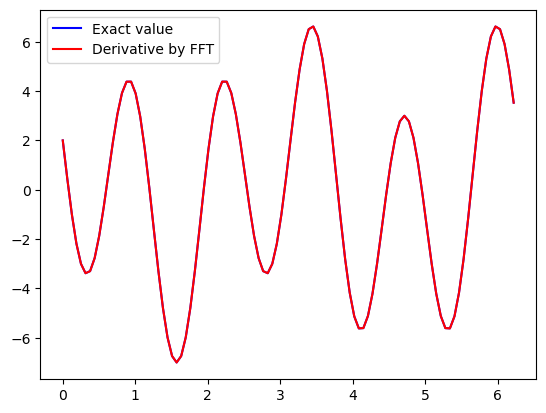

In [22]:
from scipy.fftpack import fft, ifft, dct, idct, dst, idst, fftshift, fftfreq
from numpy import linspace, zeros, array, pi, sin, cos, exp
import matplotlib.pyplot as plt

N = 100
x = linspace(0,2*pi,N, endpoint=False) # (1.)

dx = x[1]-x[0]
y = sin(2*x)+cos(5*x)
dydx = 2*cos(2*x)-5*sin(5*x)

k = fftfreq(N,dx)
print(k)
# (2.)

dydx1 = ifft(2*pi*k*1j*fft(y)).real # (3.)

plt.plot(x,dydx,'b',label='Exact value')
plt.plot(x,dydx1,'r',label='Derivative by FFT')
plt.legend()
plt.show()

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.   0. -49. -48. -47. -46. -45.
 -44. -43. -42. -41. -40. -39. -38. -37. -36. -35. -34. -33. -32. -31.
 -30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20. -19. -18. -17.
 -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.]


/home/liu/anaconda3/envs/deeplearning/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/liu/anaconda3/envs/deeplearning/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


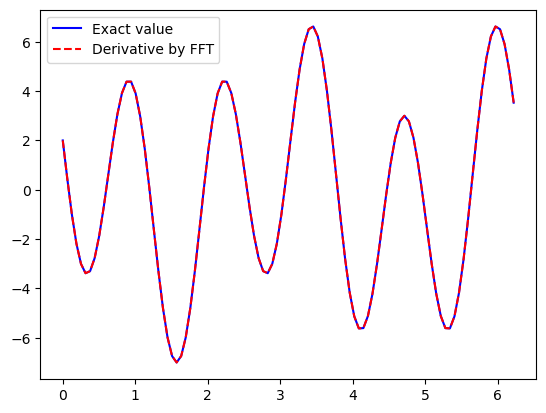

In [24]:
from scipy.fftpack import fft, ifft, dct, idct, dst, idst, fftshift, fftfreq
from numpy import linspace, zeros, array, pi, sin, cos, exp, arange
import matplotlib.pyplot as plt


N = 100
x = 2*pi*arange(0,N,1)/N #-open-periodic domain                                                   

dx = x[1]-x[0]
y = sin(2*x)+cos(5*x)
dydx = 2*cos(2*x)-5*sin(5*x)


k2=zeros(N)

if ((N%2)==0):
    #-even number                                                                                   
    for i in range(1,N//2):
        k2[i]=i
        k2[N-i]=-i
else:
    #-odd number                                                                                    
    for i in range(1,(N-1)//2):
        k2[i]=i
        k2[N-i]=-i
        
print(k2)

dydx1 = ifft(1j*k2*fft(y))

plt.plot(x,dydx,'b',label='Exact value')
plt.plot(x,dydx1, color='r', linestyle='--', label='Derivative by FFT')
plt.legend()
plt.show()

In [40]:
import torch
import torch.fft

def compute_spatial_derivatives(u):
    # Assuming u has shape [B, 1, X, Y, Z]
    B, _, X, Y, Z = u.shape
    
    # Compute the Fourier Transform along spatial dimensions (X, Y, Z)
    u_fft = torch.fft.fftn(u, dim=(2, 3, 4))
    
    # Frequency components for X, Y, Z
    kx = torch.fft.fftfreq(X, d=1.0).to(u.device)  # X-axis frequencies
    ky = torch.fft.fftfreq(Y, d=1.0).to(u.device)  # Y-axis frequencies
    kz = torch.fft.fftfreq(Z, d=1.0).to(u.device)  # Z-axis frequencies

    # Create a grid of frequencies
    kx = kx.reshape(1, 1, X, 1, 1)  # Reshape to broadcast
    ky = ky.reshape(1, 1, 1, Y, 1)  # Reshape to broadcast
    kz = kz.reshape(1, 1, 1, 1, Z)  # Reshape to broadcast

    # Compute the derivatives in Fourier space
    # The derivatives are computed by multiplying by (i * 2 * pi * k)
    u_fft_x = (1j * 2 * torch.pi * kx) * u_fft
    u_fft_y = (1j * 2 * torch.pi * ky) * u_fft
    u_fft_z = (1j * 2 * torch.pi * kz) * u_fft

    # Inverse Fourier transform to get back to spatial domain
    u_x = torch.fft.ifftn(u_fft_x, dim=(2, 3, 4)).real
    u_y = torch.fft.ifftn(u_fft_y, dim=(2, 3, 4)).real
    u_z = torch.fft.ifftn(u_fft_z, dim=(2, 3, 4)).real

    return u_x, u_y, u_z

# Example usage
# Create a sample tensor with shape [B, 1, X, Y, Z]
B, X, Y, Z = 2, 64, 64, 64
u = torch.rand(B, 1, X, Y, Z)

# Calculate spatial derivatives
u_x, u_y, u_z = compute_spatial_derivatives(u)

print(f"Shape of u_x: {u_x.shape}")
print(f"Shape of u_y: {u_y.shape}")
print(f"Shape of u_z: {u_z.shape}")


Shape of u_x: torch.Size([2, 1, 64, 64, 64])
Shape of u_y: torch.Size([2, 1, 64, 64, 64])
Shape of u_z: torch.Size([2, 1, 64, 64, 64])


In [53]:
def compute_spatial_derivatives(u):
    # Assuming u has shape [B, 1, X, Y, Z]
    B, _, X, Y, Z = u.shape
    
    # Compute the Fourier Transform along spatial dimensions (X, Y, Z)
    u_fft = torch.fft.fftn(u, dim=(2, 3, 4))
    
    # Frequency components for X, Y, Z
    kx = torch.fft.fftfreq(X, d=2*pi/X).to(u.device)  # X-axis frequencies
    ky = torch.fft.fftfreq(Y, d=2*pi/Y).to(u.device)  # Y-axis frequencies
    kz = torch.fft.fftfreq(Z, d=2*pi/Z).to(u.device)  # Z-axis frequencies

    # Create a grid of frequencies
    kx = kx.reshape(1, 1, X, 1, 1)  # Reshape to broadcast
    ky = ky.reshape(1, 1, 1, Y, 1)  # Reshape to broadcast
    kz = kz.reshape(1, 1, 1, 1, Z)  # Reshape to broadcast

    # Compute the derivatives in Fourier space
    # The derivatives are computed by multiplying by (i * 2 * pi * k)
    u_fft_x = (1j * 2 * torch.pi * kx) * u_fft
    u_fft_y = (1j * 2 * torch.pi * ky) * u_fft
    u_fft_z = (1j * 2 * torch.pi * kz) * u_fft

    # Inverse Fourier transform to get back to spatial domain
    u_x = torch.fft.ifftn(u_fft_x, dim=(2, 3, 4)).real
    u_y = torch.fft.ifftn(u_fft_y, dim=(2, 3, 4)).real
    u_z = torch.fft.ifftn(u_fft_z, dim=(2, 3, 4)).real

    return u_x, u_y, u_z


x=2*pi*torch.arange(0,64,1)/64
y=2*pi*torch.arange(0,32,1)/32
z=2*pi*torch.arange(0,128,1)/128
x,y,z=torch.meshgrid(x,y,z)
u=torch.sin(x)+torch.cos(y)+torch.sin(z)+torch.cos(z)
u=u.unsqueeze(0).unsqueeze(0)
print(u.shape)
u_x, u_y, u_z = compute_spatial_derivatives(u)

torch.Size([1, 1, 64, 32, 128])


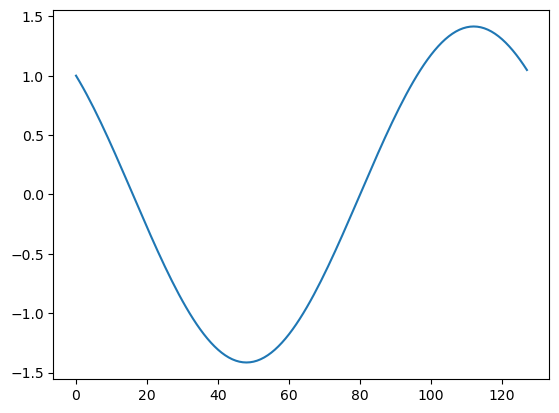

In [65]:
import matplotlib.pyplot as plt

plt.plot(u_z[0,0,20,10,:])

In [84]:
import torch
from typing import Union, Sequence

class WaveNumber:
    
    def __init__(self,
                 mesh_info:Sequence[tuple[int,int,float]],
                 device=None,
                 dtype=None) -> None:
        self.mesh_info=mesh_info
        self.fs=[[] for _ in range(len(mesh_info))]
        self._dim_names=["x","y","z"]
        self.device=device
        self.dtype=dtype
    
    def __len__(self):
        return len(self.mesh_info)
    
    def __getitem__(self,idx:int):
        if len(self.fs)<=idx:
            if idx>2:
                raise ValueError(f"fft frequency with id{idx} is not defined")
            else:
                raise ValueError(f"{self._dim_names[idx]} fft frequency is not defined")
        if len(self.fs[idx])==0:
            self.fs[idx]=torch.fft.fftfreq(self.mesh_info[idx][1]-self.mesh_info[idx][0],
                                           d=self.mesh_info[idx][2],
                                           device=self.device,
                                           dtype=self.dtype)
        return self.fs[idx]
    
    @property
    def f_x(self):
        return self[0]
    
    @property
    def f_y(self):
        return self[1]
    
    @property
    def f_z(self):
        return self[2]

class MeshGrid:
    
    def __init__(self,
                 mesh_info:Sequence[tuple[int,int,float]],
                 device=None,
                 dtype=None) -> None:
        self.mesh_info=mesh_info
        self.meshs=[[] for _ in range(len(mesh_info))]
        self.mesh_grid=None
        self._dim_names=["x","y","z"]
        self.device=device
        self.dtype=dtype
    
    def __len__(self):
        return len(self.mesh_info)
    
    def __getitem__(self,idx:int):
        if len(self.meshs)<=idx:
            if idx>2:
                raise ValueError(f"mesh dim with id{idx} is not defined")
            else:
                raise ValueError(f"{self._dim_names[idx]} dim is not defined")
        if len(self.meshs[idx])==0:
            self.meshs[idx]=(self.mesh_info[idx][1]-self.mesh_info[idx][0])*torch.arange(0,
                                                                                         self.mesh_info[idx][2],
                                                                                         device=self.device,
                                                                                         dtype=self.dtype)/self.mesh_info[idx][2]
        return self.meshs[idx]
    
    @property
    def x(self):
        return self[0]
    
    @property
    def y(self):
        return self[1]
    
    @property
    def z(self):
        return self[2]

    @property    
    def mesh_grid(self):
        if self.mesh_grid is None:
            self.mesh_grid=torch.meshgrid(*[self[i] for i in range(len(self))])
        return self.mesh_grid
    
class FourierMeshGrid(MeshGrid):
    
    def __init__(self, mesh_info: Sequence[tuple[float, float, int]], device=None, dtype=None) -> None:
        super().__init__(mesh_info, device, dtype)
        self.f=WaveNumber(mesh_info,device=device,dtype=dtype)
    
    @property
    def f_x(self):
        return self.f.f_x
    
    @property
    def f_y(self):
        return self.f.f_y
    
    @property
    def f_z(self):
        return self.f.f_z    


def fourier_spatial_grad(u:torch.Tensor,
                                dim:Union[int, Sequence[int]]=-1,
                                order:Union[int, Sequence[int]]=1,
                                ):
    # Assuming u has shape [B, 1, X, Y, Z]
    B, _, X, Y, Z = u.shape
    
    # Compute the Fourier Transform along spatial dimensions (X, Y, Z)
    u_fft = torch.fft.fftn(u, dim=(2, 3, 4))
    
    # Frequency components for X, Y, Z
    kx = torch.fft.fftfreq(X, d=2*pi/X).to(u.device)  # X-axis frequencies
    ky = torch.fft.fftfreq(Y, d=2*pi/Y).to(u.device)  # Y-axis frequencies
    kz = torch.fft.fftfreq(Z, d=2*pi/Z).to(u.device)  # Z-axis frequencies

    # Create a grid of frequencies
    kx = kx.reshape(1, 1, X, 1, 1)  # Reshape to broadcast
    ky = ky.reshape(1, 1, 1, Y, 1)  # Reshape to broadcast
    kz = kz.reshape(1, 1, 1, 1, Z)  # Reshape to broadcast

    # Compute the derivatives in Fourier space
    # The derivatives are computed by multiplying by (i * 2 * pi * k)
    u_fft_x = (1j * 2 * torch.pi * kx) * u_fft
    u_fft_y = (1j * 2 * torch.pi * ky) * u_fft
    u_fft_z = (1j * 2 * torch.pi * kz) * u_fft

    # Inverse Fourier transform to get back to spatial domain
    u_x = torch.fft.ifftn(u_fft_x, dim=(2, 3, 4)).real
    u_y = torch.fft.ifftn(u_fft_y, dim=(2, 3, 4)).real
    u_z = torch.fft.ifftn(u_fft_z, dim=(2, 3, 4)).real

    return u_x, u_y, u_z

ValueError: Currently fft frequency with id5 is not defined

In [87]:
import torch
torch.arange(0,64)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [78]:
from typing import Tuple
def func_a(para:tuple[int, str] ):
    print(isinstance(para, tuple[int, str]))
    print(para)
    
func_a(5)

TypeError: isinstance() argument 2 cannot be a parameterized generic